In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
plt.style.use('fivethirtyeight')

In [6]:
end = datetime.now()
start = datetime(end.year-15, end.month, end.day)
stock = "BTC-USD"
stock_data = yf.download(stock, start=start, end = end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
stock_data.tail()


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-03-21,84043.242188,84782.273438,83171.070312,84164.539062,19030452299
2025-03-22,83832.484375,84513.875000,83674.781250,84046.257812,9863214091
2025-03-23,86054.375000,86094.781250,83794.914062,83831.898438,12594615537
2025-03-24,87498.914062,88758.726562,85541.195312,86070.929688,34582604933
2025-03-26,87401.726562,87884.992188,87117.851562,87458.625000,28793800704


In [8]:
stock_data.describe().T

,,count,mean,std,min,25%,50%,75%,max
Price,Ticker,,,,,,,,
Close,BTC-USD,3843.0,2.121325e+04,2.446552e+04,1.781030e+02,1.546560e+03,9.613424e+03,3.430442e+04,1.061463e+05
High,BTC-USD,3843.0,2.166254e+04,2.496585e+04,2.117310e+02,1.587760e+03,9.779200e+03,3.518516e+04,1.091149e+05
Low,BTC-USD,3843.0,2.069573e+04,2.389423e+04,1.715100e+02,1.510515e+03,9.402290e+03,3.328020e+04,1.052917e+05
Open,BTC-USD,3843.0,2.119180e+04,2.444599e+04,1.768970e+02,1.515795e+03,9.611782e+03,3.429311e+04,1.061473e+05
Volume,BTC-USD,3843.0,1.917297e+10,2.080141e+10,5.914570e+06,6.299350e+08,1.530737e+10,3.039909e+10,3.509679e+11


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3843 entries, 2014-09-17 to 2025-03-25
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3843 non-null   float64
 1   (High, BTC-USD)    3843 non-null   float64
 2   (Low, BTC-USD)     3843 non-null   float64
 3   (Open, BTC-USD)    3843 non-null   float64
 4   (Volume, BTC-USD)  3843 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 180.1 KB


In [9]:
stock_data.columns

MultiIndex([( 'Close', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            (  'Open', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])

In [10]:
#Close price data
closing_price = stock_data[['Close']]

In [14]:
closing_price['Close']

Ticker,BTC-USD
Date,
2014-09-17 00:00:00+00:00,457.334015
2014-09-18 00:00:00+00:00,424.440002
2014-09-19 00:00:00+00:00,394.795990
2014-09-20 00:00:00+00:00,408.903992
2014-09-21 00:00:00+00:00,398.821014
...,...
2024-11-16 00:00:00+00:00,90558.476562
2024-11-17 00:00:00+00:00,89845.851562
2024-11-18 00:00:00+00:00,90542.640625


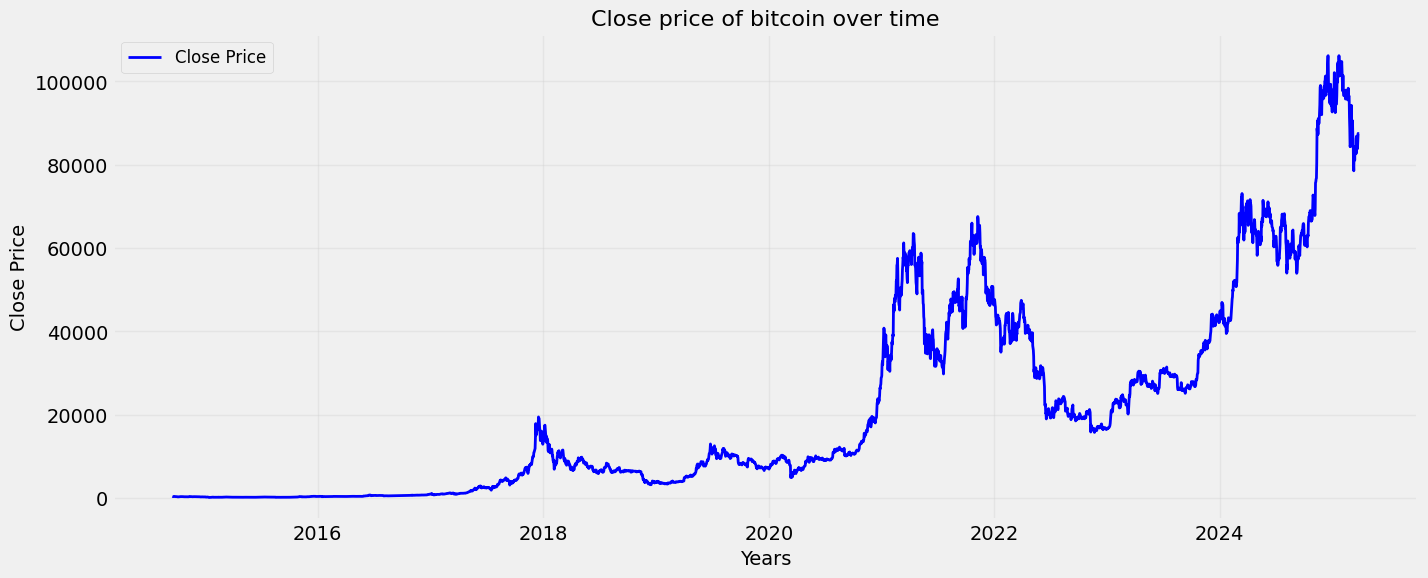

In [11]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of bitcoin over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [12]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [13]:
df1 = pd.DataFrame(temp_data)

In [14]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [15]:
for i in range(2014, 2025):
    print(i, list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365
2024 366


In [16]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

/tmp/ipykernel_45973/194502310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
/tmp/ipykernel_45973/194502310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


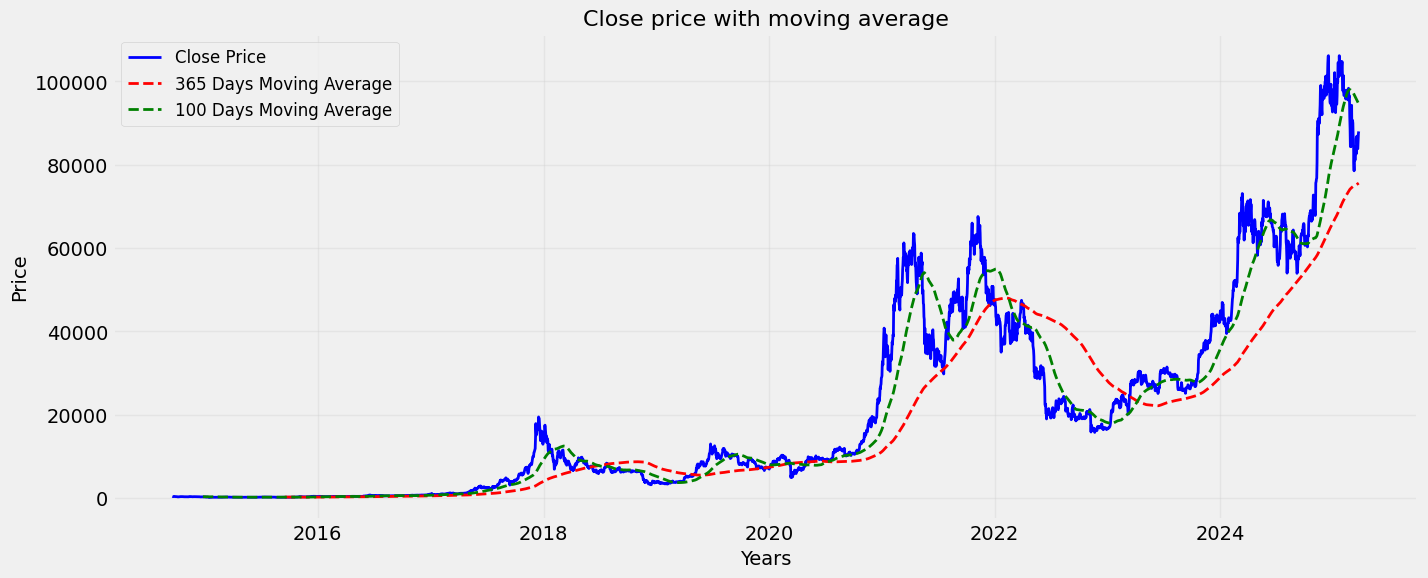

In [15]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [16]:
# LSTM-> Long short term memory
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [17]:
len(scaled_data)

3843

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

2025-03-25 23:41:01.145000: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-25 23:41:01.411907: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2025-03-25 23:41:01.411959: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2025-03-25 23:41:05.497242: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-

In [20]:
# Prepare data for lstm
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [21]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [22]:
model = Sequential([
    LSTM(128, return_sequences = True, input_shape = (x_train.shape[1], 1)),
    LSTM(64, return_sequences = False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer = "adam", loss = "mean_squared_error")
model.summary()

2025-03-25 23:42:01.037671: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2025-03-25 23:42:01.037768: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2025-03-25 23:42:01.037837: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pranay-kumar): /proc/driver/nvidia/version does not exist
2025-03-25 23:42:01.038603: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 128)          66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 25)                1625      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 117,619
Trainable params: 117,619
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.fit(x_train, y_train, batch_size = 5, epochs = 10)

Epoch 1/10
674/674 [==============================] - 79s 105ms/step - loss: 8.2235e-04
Epoch 2/10
674/674 [==============================] - 72s 106ms/step - loss: 2.5247e-04
Epoch 3/10
674/674 [==============================] - 71s 105ms/step - loss: 1.9927e-04
Epoch 4/10
674/674 [==============================] - 78s 116ms/step - loss: 1.6301e-04
Epoch 5/10
674/674 [==============================] - 69s 102ms/step - loss: 1.4210e-04
Epoch 6/10
674/674 [==============================] - 70s 103ms/step - loss: 1.3882e-04
Epoch 7/10
674/674 [==============================] - 72s 106ms/step - loss: 1.2373e-04
Epoch 8/10
341/674 [==============>...............] - ETA: 36s - loss: 1.2278e-04

KeyboardInterrupt: 

In [ ]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

In [ ]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(), 
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [40]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1, 1)
future_predictions=[]
for _ in range(10):
    next_days = model.predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis = 1)

1/1 [==============================] - 0s 79ms/step


In [42]:
future_predictions

[array([[89482.07]], dtype=float32),
 array([[84445.73]], dtype=float32),
 array([[79918.17]], dtype=float32),
 array([[75903.52]], dtype=float32),
 array([[72325.46]], dtype=float32),
 array([[69118.9]], dtype=float32),
 array([[66238.99]], dtype=float32),
 array([[63653.387]], dtype=float32),
 array([[61335.004]], dtype=float32),
 array([[59258.15]], dtype=float32)]

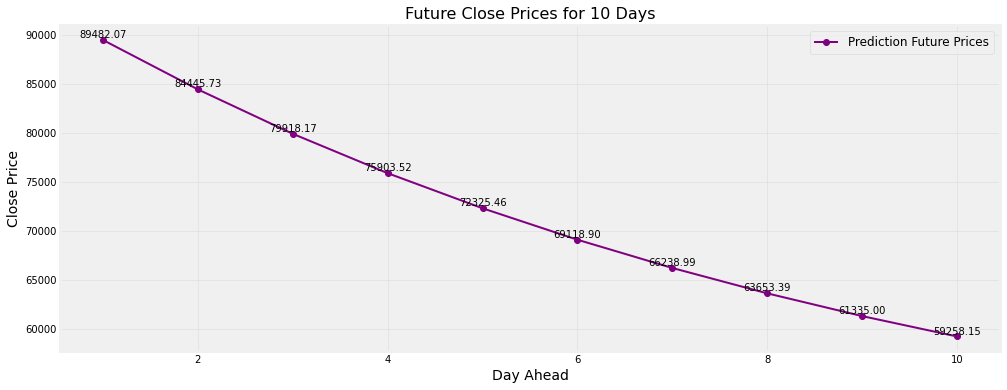

In [44]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
model.save("model.keras")